In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import random

In [47]:
dic = pd.read_csv('data_dictionary.csv')

In [257]:
pd.set_option('display.max_colwidth', None)

In [258]:
dic

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a table
1,orders,date,Date the order was placed (entered into the system prior to cooking & serving)
2,orders,time,Time the order was placed (entered into the system prior to cooking & serving)
3,order_details,order_details_id,"Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)"
4,order_details,order_id,Foreign key that ties the details in each order to the order itself
5,order_details,pizza_id,"Foreign key that ties the pizza ordered to its details, like size and price"
6,order_details,quantity,Quantity ordered for each pizza of the same type and size
7,pizzas,pizza_id,Unique identifier for each pizza (constituted by its type and size)
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broader pizza type
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Large, or XX Large)"


# Небольшая предобработка данных

In [49]:
orders = pd.read_csv('orders.csv')

In [50]:
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [51]:
orders.shape

(21350, 3)

In [52]:
order_details = pd.read_csv('order_details.csv')

In [53]:
# первая функция для "отклейки" размера пиццы от ее названия

def pizza_size(pizza_id):
    if pizza_id == 'the_greek_xxl':
        return pizza_id[-3:].upper()
    elif pizza_id == 'the_greek_xl':
        return pizza_id[-2:].upper()
    else:
        return pizza_id[-1].upper()

In [54]:
# вторая функция для "отклейки" размера пиццы от ее названия

def pizza_name(pizza_id):
    if pizza_id == 'the_greek_xxl':
        return pizza_id[:-4]
    elif pizza_id == 'the_greek_xl':
        return pizza_id[:-3]
    else:
        return pizza_id[:-2]

In [55]:
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [56]:
order_details.pizza_id.unique()

array(['hawaiian_m', 'classic_dlx_m', 'five_cheese_l', 'ital_supr_l',
       'mexicana_m', 'thai_ckn_l', 'ital_supr_m', 'prsc_argla_l',
       'bbq_ckn_s', 'the_greek_s', 'spinach_supr_s', 'classic_dlx_s',
       'green_garden_s', 'ital_cpcllo_l', 'ital_supr_s', 'mexicana_s',
       'spicy_ital_l', 'spin_pesto_l', 'veggie_veg_s', 'mexicana_l',
       'southw_ckn_l', 'bbq_ckn_l', 'cali_ckn_l', 'cali_ckn_m',
       'pepperoni_l', 'cali_ckn_s', 'ckn_pesto_l', 'big_meat_s',
       'soppressata_l', 'four_cheese_l', 'napolitana_s', 'calabrese_m',
       'four_cheese_m', 'ital_veggie_s', 'mediterraneo_m',
       'peppr_salami_s', 'spinach_fet_l', 'napolitana_l', 'sicilian_l',
       'ital_cpcllo_m', 'southw_ckn_s', 'bbq_ckn_m', 'pepperoni_m',
       'prsc_argla_s', 'sicilian_m', 'veggie_veg_l', 'ckn_alfredo_s',
       'pepperoni_s', 'green_garden_l', 'green_garden_m', 'pep_msh_pep_l',
       'hawaiian_s', 'peppr_salami_m', 'ckn_alfredo_m', 'peppr_salami_l',
       'spin_pesto_s', 'thai_ckn_m'

In [57]:
order_details.shape

(48620, 4)

In [58]:
pizza_types = pd.read_csv('pizza_types.csv', encoding='cp1251')

In [59]:
pizza_types.rename(columns={'pizza_type_id': 'pizza_id'}, inplace=True)
pizza_types.head()

,pizza_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [60]:
pizza_types.shape

(32, 4)

In [61]:
pizzas = pd.read_csv('pizzas.csv')

In [62]:
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [63]:
pizzas.shape

(96, 4)

In [64]:
orders.head(1)

,order_id,date,time
0,1,2015-01-01,11:38:36


In [65]:
order_details.head(1)

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1


In [66]:
pizzas.head(1)

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75


In [67]:
pizza_types.rename(columns={'pizza_id': 'pizza_type_id'}, inplace=True)
pizza_types.head(1)

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."


In [68]:
df = orders.merge(order_details, how='right', on='order_id')

In [69]:
df

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1
...,...,...,...,...,...,...
48615,21348,2015-12-31,21:23:10,48616,ckn_alfredo_m,1
48616,21348,2015-12-31,21:23:10,48617,four_cheese_l,1
48617,21348,2015-12-31,21:23:10,48618,napolitana_s,1
48618,21349,2015-12-31,22:09:54,48619,mexicana_l,1


In [70]:
df2 = df.merge(pizzas, how='left', on='pizza_id')

In [71]:
df.head()

,order_id,date,time,order_details_id,pizza_id,quantity
0,1,2015-01-01,11:38:36,1,hawaiian_m,1
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1
2,2,2015-01-01,11:57:40,3,five_cheese_l,1
3,2,2015-01-01,11:57:40,4,ital_supr_l,1
4,2,2015-01-01,11:57:40,5,mexicana_m,1


In [72]:
df3 = df2.merge(pizza_types, how='left', on='pizza_type_id')

In [73]:
df3.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [74]:
pizza = df3.copy()

In [75]:
pizza.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


Склеили все таблицы в одну, теперь будет проще фильтровать и аггрегировать нужные данные.
Финальная таблица - 'pizza'.

# Посмотрим данные по заказам

In [76]:
order_info = pizza[['order_id', 'name', 'quantity', 'size', 'category', 'date', 'time', 'price']]

In [77]:
order_info.head()

,order_id,name,quantity,size,category,date,time,price
0,1,The Hawaiian Pizza,1,M,Classic,2015-01-01,11:38:36,13.25
1,2,The Classic Deluxe Pizza,1,M,Classic,2015-01-01,11:57:40,16.00
2,2,The Five Cheese Pizza,1,L,Veggie,2015-01-01,11:57:40,18.50
3,2,The Italian Supreme Pizza,1,L,Supreme,2015-01-01,11:57:40,20.75
4,2,The Mexicana Pizza,1,M,Veggie,2015-01-01,11:57:40,16.00


In [78]:
# теперь в price будет сразу указано сколько стоят все заказанные пиццы этого типа

order_info['price'] = order_info['price'] * order_info['quantity']

C:\Users\Temich\AppData\Local\Temp\ipykernel_12248\3282277208.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_info['price'] = order_info['price'] * order_info['quantity']


In [79]:
unique_orders = order_info \
    .groupby('order_id', as_index=False) \
    .agg({'quantity': 'sum', 'price': 'sum'}) \
    .rename(columns={'quantity': 'order_size', 'price': 'order_price'})
unique_orders.head()

,order_id,order_size,order_price
0,1,1,13.25
1,2,5,92.00
2,3,2,37.25
3,4,1,16.50
4,5,1,16.50


In [80]:
# искусственно добавим айдишники пользователей

unique_orders['user_id'] = [random.randint(1, 4621) for _ in range(len(unique_orders))]

In [81]:
unique_orders = unique_orders[['order_id', 'user_id', 'order_size', 'order_price']]

In [82]:
unique_orders.head()

,order_id,user_id,order_size,order_price
0,1,1389,1,13.25
1,2,380,5,92.00
2,3,2010,2,37.25
3,4,736,1,16.50
4,5,1400,1,16.50


In [83]:
unique_orders.order_price.sum()

817860.0499999999

In [84]:
# добавим пользователей в основную таблицу

pizza = pizza.merge(unique_orders, how='left', on='order_id')
pizza = pizza[['order_id', 'user_id', 'date', 'time', 'order_details_id', 'pizza_id', 'quantity', 
              'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients']]

In [85]:
pizza.head()

,order_id,user_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,1389,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,380,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,380,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,380,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,380,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


In [86]:
# глянем на наших замечательных вип-клиентов за имеющийся период

unique_orders \
    .groupby('user_id', as_index=False) \
    .agg({'order_id': 'count', 'order_size': 'sum', 'order_price': 'sum'}) \
    .sort_values('order_price', ascending=False) \
    .head()

,user_id,order_id,order_size,order_price
3829,3873,8,43,736.00
2836,2867,7,42,724.90
1592,1610,12,44,721.35
1028,1042,11,40,700.95
2903,2935,10,39,675.60


# Посчитаем основные метрики

In [87]:
# переделаем тип столбца 'date' в datetime

pizza.date = pd.to_datetime(pizza.date)

### DAU

Не уверен в большой полезности этой метрики для нашей онлайн-пиццерии, особенно с таким большим исследуемым периодом. Можно разбить период на месяцы или недели, или посчитать WAU, но большой пользы это, скорее всего, не принесет.

В нашем случае DAU мне больше всего представляется неким филлером для дашборда, который часто на виду. Посмотрел на вчерашний день --> день как день, похож на другие дни --> пошел работать себе дальше.

In [90]:
dau = pizza \
    .groupby('date') \
    .agg({'user_id': 'nunique'}) \
    .rename(columns={'user_id': 'active_users'}) \
    .reset_index()
dau.head()

,date,active_users
0,2015-01-01,69
1,2015-01-02,65
2,2015-01-03,65
3,2015-01-04,52
4,2015-01-05,54


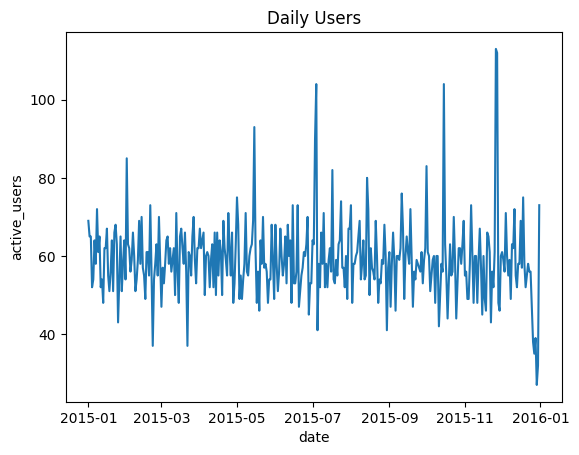

In [91]:
sns.lineplot(data=dau, x='date', y='active_users')
plt.title('Daily Users');

In [92]:
# 10 лучших дней по кол-ву клиентов
dau.sort_values('active_users', ascending=False).head(10)

,date,active_users
323,2015-11-26,113
324,2015-11-27,112
184,2015-07-04,104
283,2015-10-15,104
134,2015-05-15,93
183,2015-07-03,90
31,2015-02-01,85
271,2015-10-01,83
197,2015-07-17,82
225,2015-08-14,80


In [93]:
# 10 худших дней по кол-ву клиентов
dau.sort_values('active_users', ascending=False).tail(10)

,date,active_users
280,2015-10-11,42
241,2015-08-30,41
185,2015-07-05,41
354,2015-12-28,39
352,2015-12-26,38
80,2015-03-22,37
52,2015-02-22,37
353,2015-12-27,35
356,2015-12-30,32
355,2015-12-29,27


### MAU

In [94]:
mau = pizza \
    .groupby(pizza['date'].dt.strftime('%Y-%m')) \
    .agg({'user_id': 'nunique'}) \
    .rename(columns={'user_id': 'active_users'}) \
    .reset_index()

mau

,date,active_users
0,2015-01,1517
1,2015-02,1402
2,2015-03,1527
3,2015-04,1511
4,2015-05,1535
5,2015-06,1480
6,2015-07,1572
7,2015-08,1531
8,2015-09,1390
9,2015-10,1362


In [98]:
avg_daily_active_users = dau \
    .groupby(dau['date'].dt.strftime('%Y-%m')) \
    .agg({'active_users': 'mean'}) \
    .round(2) \
    .reset_index()
avg_daily_active_users

,date,active_users
0,2015-01,59.13
1,2015-02,59.79
2,2015-03,58.84
3,2015-04,59.70
4,2015-05,59.45
5,2015-06,58.47
6,2015-07,61.90
7,2015-08,59.19
8,2015-09,59.00
9,2015-10,60.19


In [100]:
mau.merge(avg_daily_active_users, on='date') \
    .rename(columns={'active_users_y': 'avg_daily_active_users'})

,date,active_users_x,avg_daily_active_users
0,2015-01,1517,59.13
1,2015-02,1402,59.79
2,2015-03,1527,58.84
3,2015-04,1511,59.70
4,2015-05,1535,59.45
5,2015-06,1480,58.47
6,2015-07,1572,61.90
7,2015-08,1531,59.19
8,2015-09,1390,59.00
9,2015-10,1362,60.19


In [101]:
avg_daily_active_users.date = pd.to_datetime(avg_daily_active_users.date)
mau.date = pd.to_datetime(mau.date)
dau.date = pd.to_datetime(dau.date)

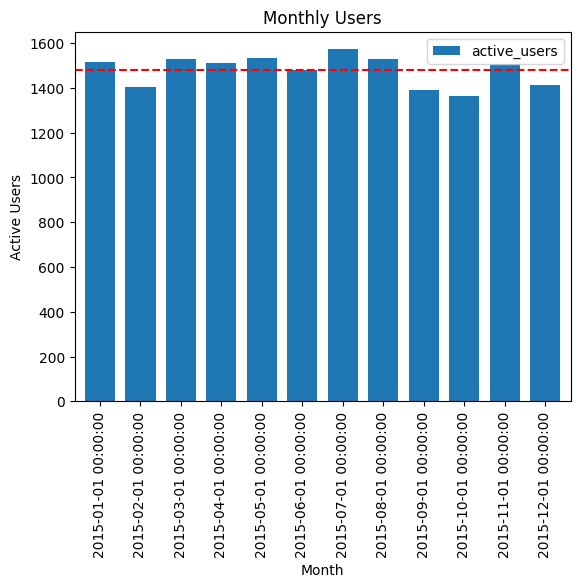

In [102]:
mau.plot(kind='bar', x='date', xlabel='Month', ylabel='Active Users', width=0.75)
plt.axhline(mau.active_users.mean(), color='red', linestyle='--')
plt.title('Monthly Users')
plt.show()

### RR / CR

В нашем примере предположим, что мы считаем пользователя потерянным, если он ничего не заказывал уже 90 или более дней.

In [103]:
lost_user = 90

In [104]:
first_n_last_order = pizza \
    .groupby('user_id', as_index=False) \
    .agg({'date': 'max', 'order_id': 'max'}) \
    .rename(columns={'date': 'last_date', 'order_id': 'last_order_id'})
first_n_last_order.head()

,user_id,last_date,last_order_id
0,1,2015-07-31,12726
1,2,2015-02-03,2037
2,3,2015-11-02,17980
3,4,2015-07-27,12455
4,5,2015-09-20,15744


In [105]:
# пытаюсь вывести колонку "сколько месяцов прошло с последнего заказа"
first_n_last_order['months_since_last_action'] = pd.to_datetime('2016-01-01') - pd.to_datetime(first_n_last_order['last_date'])

In [106]:
# получились дни правда. Все равно нужно привести к инту, чтобы дальше с ней было проще работать
first_n_last_order['months_since_last_action'] = first_n_last_order['months_since_last_action'].dt.components.days.astype(int)

In [107]:
# ну и переименуем во избежаение путианицы
first_n_last_order.rename(columns={'months_since_last_action': 'days_since_last_action'}, inplace=True)

In [108]:
first_n_last_order.head()

,user_id,last_date,last_order_id,days_since_last_action
0,1,2015-07-31,12726,154
1,2,2015-02-03,2037,332
2,3,2015-11-02,17980,60
3,4,2015-07-27,12455,158
4,5,2015-09-20,15744,103


In [109]:
first_n_last_order_2 = first_n_last_order[['user_id', 'days_since_last_action']]
first_n_last_order_2.head(1)

,user_id,days_since_last_action
0,1,154


In [110]:
last_order = unique_orders.merge(first_n_last_order_2, how='left', on='user_id')

In [111]:
total_users_now = last_order[last_order['days_since_last_action'] <= lost_user].user_id.nunique()
total_users_start = pizza.user_id.nunique()

rr = total_users_now / total_users_start * 100
round(rr, 2)

66.49

**RR = 66,49 %.**

**CR = 100 - 66,49 % = 33,51 %.**

### LTV

LTV = (средняя прибыль с продажи) x (среднее число продаж в месяц на клиента) x (среднее время удержания клиента в месяцах)


In [112]:
unique_orders.head()

,order_id,user_id,order_size,order_price
0,1,1389,1,13.25
1,2,380,5,92.00
2,3,2010,2,37.25
3,4,736,1,16.50
4,5,1400,1,16.50


In [113]:
mean_order_price = unique_orders.order_price.mean()
mean_order_price

38.30726229508196

In [114]:
mean_orders_monthly = unique_orders.order_id.count() / unique_orders.user_id.nunique() / 12
mean_orders_monthly

0.38939957685853943

In [115]:
# сколько в среднем месяцев "живет" клиент
lt = rr / 100 * 12
lt

7.978988837820091

In [116]:
ltv = mean_order_price * mean_orders_monthly * lt
ltv

119.02123385585796

**LTV = 119.02 долларов.**

Считаю, что в данном случае это слишком надуманная метрика, также как и retention/churn rate. Не будем им особо доверять.

### CAC, CPI, ROI и прочие метрики, учитывающие затраты

Пока что данных о затратах нет, поэтому и считать пока что нечего. Будем считать, что все клиенты пришли к нам сами :)

Можно было бы посчитать ROI по каждой пицце каждого размера, но мы не знаем по какой цене закупаем ингридиенты :)) 

# Проанализируем пользовательское поведение

### Время заказов 

In [117]:
# сделаем разбивку по часам

def hours(col):
    return col[:2]

In [118]:
pizza_hours = pizza.copy()

In [120]:
pizza_hours['hour'] = pizza_hours['time'].apply(hours)

In [121]:
pizza_hours.head(2)

,order_id,user_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,hour
0,1,1389,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",11
1,2,380,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",11


In [122]:
orders_by_hour = pizza_hours \
    .groupby('hour', as_index=False) \
    .order_id \
    .nunique() \
    .rename(columns={'order_id': 'orders_count'})
orders_by_hour

,hour,orders_count
0,09,1
1,10,8
2,11,1231
3,12,2520
4,13,2455
5,14,1472
6,15,1468
7,16,1920
8,17,2336
9,18,2399


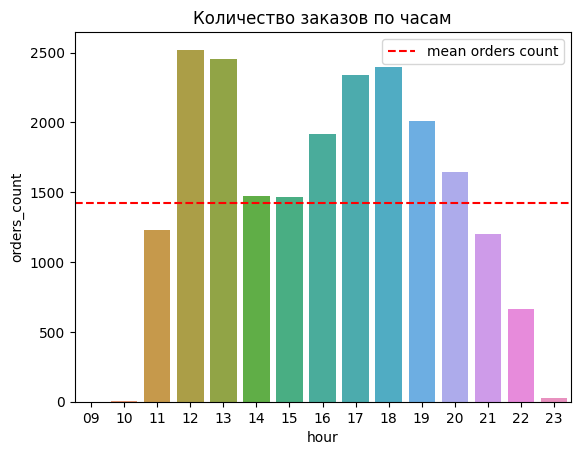

In [123]:
sns.barplot(data=orders_by_hour, x='hour', y='orders_count')
plt.axhline(orders_by_hour.orders_count.mean(), color='r', linestyle='--', label='mean orders count')
plt.title('Количество заказов по часам')
plt.legend();

In [124]:
orders_by_hour.sort_values('orders_count', ascending=False).head()

,hour,orders_count
3,12,2520
4,13,2455
9,18,2399
8,17,2336
10,19,2009


**Пиковое время приходится на 12-13 часов и 17-19 часов.**

Видимо, заказывают пиццу к обеду и ужину соответственно. Логично. Еще судя по всему, с полуночи до 9 утра мы не работаем (но это неточно). А в 9 и 10 утра за весь год у нас всего-то навсего было 9 заказов. Возможно, мы открываемся и вовсе в 11, а эти мистические заказы попали к нам случайным образом (системная ошибка или еще что-то). Проверим, кстати, теорию о том, что в одно время мы экспериментировали с временем открытия и работали с 9 часов, а не с 11.

In [125]:
pizza_hours[pizza_hours['hour'].isin(['09', '10'])]

,order_id,user_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,hour
7447,3283,3289,2015-02-25,10:54:03,7448,four_cheese_l,2,four_cheese,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",10
7448,3283,3289,2015-02-25,10:54:03,7449,napolitana_s,1,napolitana,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",10
11942,5247,1056,2015-03-30,10:50:46,11943,cali_ckn_m,1,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",10
11943,5247,1056,2015-03-30,10:50:46,11944,ckn_alfredo_l,1,ckn_alfredo,L,20.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",10
11944,5247,1056,2015-03-30,10:50:46,11945,ckn_pesto_s,1,ckn_pesto,S,12.75,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",10
12665,5564,398,2015-04-04,10:43:04,12666,calabrese_m,1,calabrese,M,16.25,The Calabrese Pizza,Supreme,"‘Nduja Salami, Pancetta, Tomatoes, Red Onions,...",10
12666,5564,398,2015-04-04,10:43:04,12667,ital_cpcllo_m,1,ital_cpcllo,M,16.00,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,...",10
12667,5564,398,2015-04-04,10:43:04,12668,napolitana_l,1,napolitana,L,20.50,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",10
17096,7521,1473,2015-05-07,10:54:15,17097,thai_ckn_l,1,thai_ckn,L,20.75,The Thai Chicken Pizza,Chicken,"Chicken, Pineapple, Tomatoes, Red Peppers, Tha...",10
22717,9991,4155,2015-06-17,10:52:26,22718,cali_ckn_m,1,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ...",10


In [126]:
pbh = pizza_hours \
    .groupby(['date', 'hour'], as_index=False) \
    .order_id \
    .nunique() \
    .rename(columns={'order_id': 'orders_count'})
pbh[pbh['hour'].isin(['09', '10'])]

,date,hour,orders_count
642,2015-02-25,10,1
1023,2015-03-30,10,1
1083,2015-04-04,10,1
1469,2015-05-07,10,1
1945,2015-06-17,10,1
2124,2015-07-02,10,1
2945,2015-09-10,10,1
3201,2015-10-04,10,1
3749,2015-11-24,09,1


Никакой закономерности не вижу. Эти заказы прилетали в абсолютно разные месяцы, айдишки заказов тоже не закономерны. Заказы не однообразные, очень походи на реальные.
Возможно, мы так тестировали систему заказов, и чтобы не смешивать тестовые заказы в кучу настоящих, делали их на 9 и 10 утра. Ну или в конце концов, просто системная ошибка.

### Любимые пиццы (в т.ч. по размеру, категории и цене) 

In [146]:
fav_pizzas = pizza \
    .groupby('name', as_index=False) \
    .quantity \
    .sum() \
    .rename(columns={'quantity': 'times_ordered'}) \
    .sort_values('times_ordered', ascending=False)
fav_pizzas

,name,times_ordered
7,The Classic Deluxe Pizza,2453
0,The Barbecue Chicken Pizza,2432
12,The Hawaiian Pizza,2422
20,The Pepperoni Pizza,2418
30,The Thai Chicken Pizza,2371
4,The California Chicken Pizza,2370
23,The Sicilian Pizza,1938
26,The Spicy Italian Pizza,1924
25,The Southwest Chicken Pizza,1917
1,The Big Meat Pizza,1914


In [149]:
# главное ничего не потерять
fav_pizzas.times_ordered.sum(), pizza.quantity.sum()

(49574, 49574)

Самые популярные наши пиццы:
1) Классическая делюкс
2) Чикен барбекю
3) Гавайская (фиии)
4) Пепперони
5) Тайский цыпленок

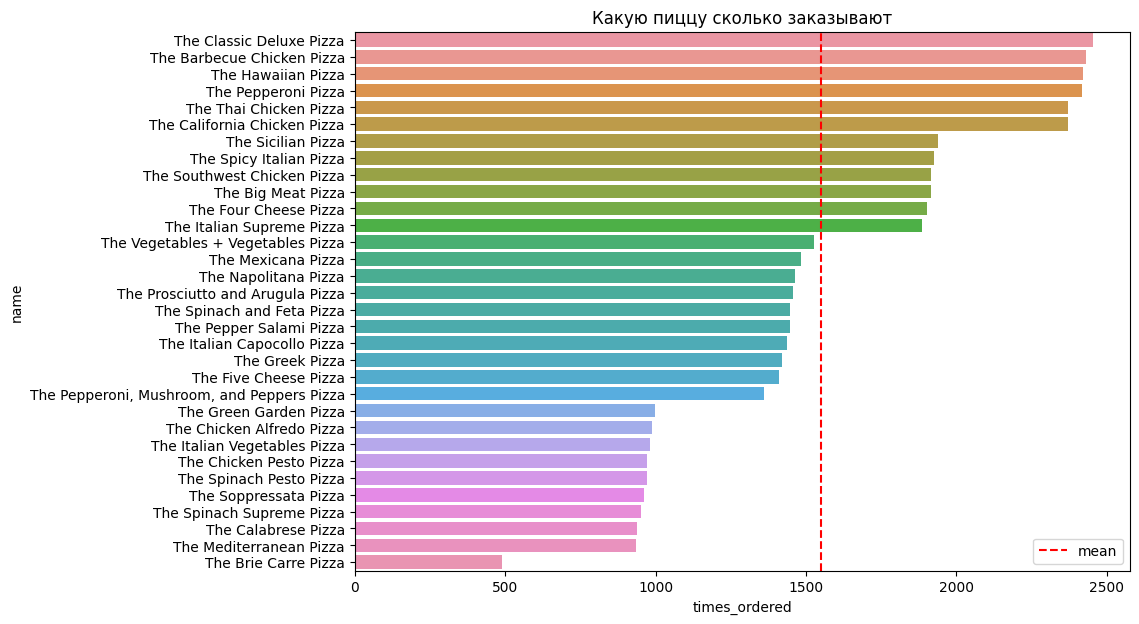

In [147]:
plt.figure(figsize=(10, 7))
sns.barplot(data=fav_pizzas, y='name', x='times_ordered', orient='h')
plt.axvline(fav_pizzas.times_ordered.mean(), color='r', linestyle='--', label='mean')
plt.title('Какую пиццу сколько заказывают')
plt.legend()
plt.show()

In [152]:
category_orders = pizza \
    .groupby('category', as_index=False) \
    .quantity \
    .sum() \
    .rename(columns={'quantity': 'times_ordered'})
category_orders

,category,times_ordered
0,Chicken,11050
1,Classic,14888
2,Supreme,11987
3,Veggie,11649


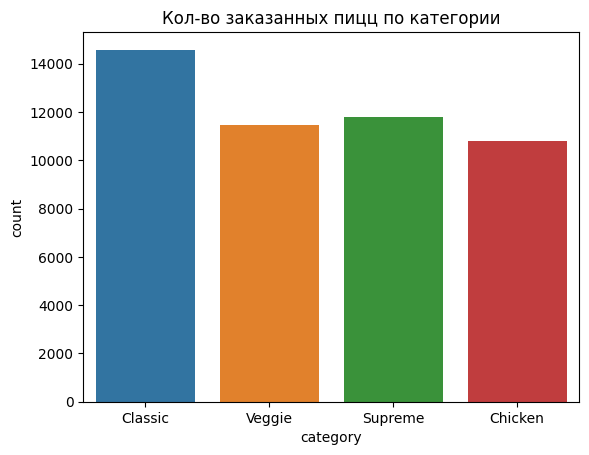

In [151]:
sns.countplot(data=pizza, x='category')
plt.title('Кол-во заказанных пицц по категории');

По категориям все примерно выглядит одинаково, самые популярные пиццы - классические (у них такая судьба - быть самыми популярными).

В принципе интересного тут мало, разве что куриные пиццы заказываются реже других, хотя в топ-5 пицц входят 3 куриные.

In [155]:
pizza \
    .groupby('size', as_index=False) \
    .quantity \
    .sum() \
    .rename(columns={'quantity': 'times_ordered'})

,size,times_ordered
0,L,18956
1,M,15635
2,S,14403
3,XL,552
4,XXL,28


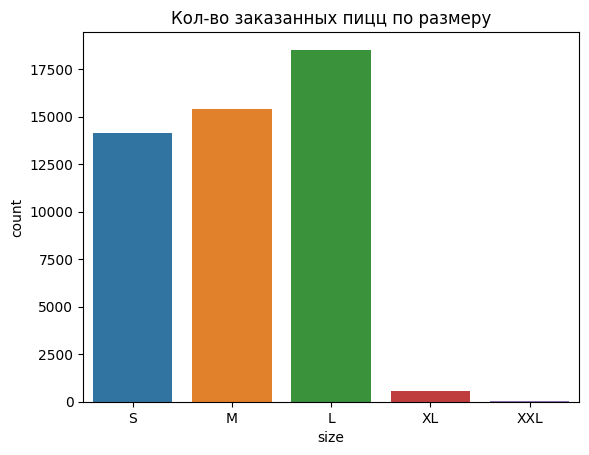

In [156]:
sns.countplot(data=pizza, x='size', order=['S', 'M', 'L', 'XL', 'XXL'])
plt.title('Кол-во заказанных пицц по размеру');

А с размерами дела обстоят интереснее, пиццы очень больших размеров почти не заказываются.
Чаще всего заказывают пиццу размера L. Скорее всего она сама выгодная по цене/размеру, да я и сам всегда беру большую пиццу без задних мыслей. Думаю, что многие берут пиццы на компанию знакомых.

Возможно, над этим стоит поработать. Сначала попробуем поискать причины такой динамики.

In [157]:
pizza \
    .groupby('size', as_index=False) \
    .price \
    .mean()

,size,price
0,L,19.802553
1,M,15.951219
2,S,12.364328
3,XL,25.500000
4,XXL,35.950000


Вполне возможно, что это связано с их ценой. Действительно, цены на очень большие пиццы заметно выше остальных.

Но меня здесь смущают очень аккуратные цифры в цене XL и XXL пицц. Изучим их получше.

In [158]:
pizzas[pizzas['size'].isin(['XL', 'XXL'])]

,pizza_id,pizza_type_id,size,price
42,the_greek_xl,the_greek,XL,25.50
43,the_greek_xxl,the_greek,XXL,35.95


Думаю, на этот моменте все встает на свои места - такие размеры есть только у "Греческой" пиццы, а она у нас - середнячок по кол-ву заказов.

**Возможно, нам имеет смысл разширить ассортимент размеров для наших самых продаваемыхх пицц, особенно для первых 12-ти, которые заказывают чаще среднего, и для пицц из категории "Классические", ведь их тоже заказывают охотнее всего.**

In [195]:
pizza_price = pizza \
    .groupby('price') \
    .quantity \
    .sum()
pizza_price

price
9.75      751
10.50    1020
11.00     578
12.00    5744
12.25     850
12.50    3380
12.75    2529
13.25     483
14.50     397
14.75     586
15.25     728
16.00    4522
16.25    1136
16.50    4111
16.75    4380
17.50     384
17.95    1316
18.50    1409
20.25    3093
20.50    2026
20.75    8891
21.00     190
23.65     490
25.50     552
35.95      28
Name: quantity, dtype: int64

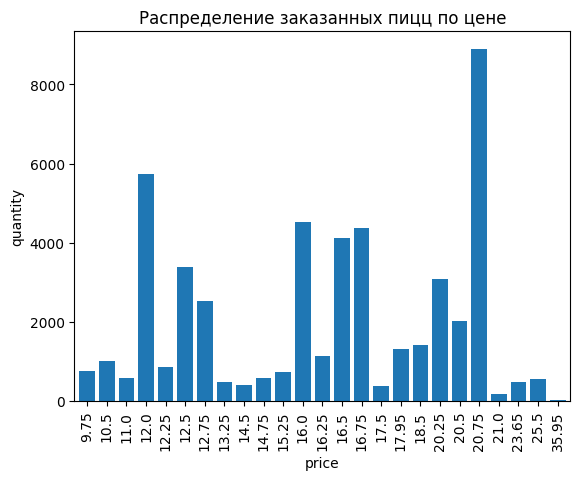

In [252]:
pizza_price.plot(kind='bar', width=0.8, ylabel='quantity')
plt.title('Распределение заказанных пицц по цене');

In [253]:
# пиццы за 20.75 долларов
pizza[pizza['pizza_id'].isin(pizzas[pizzas['price'] == 20.75].pizza_id)] \
    .groupby('pizza_id', as_index=False) \
    .quantity \
    .sum() \
    .sort_values('quantity', ascending=False) \
    .rename(columns={'quantity': 'times_ordered'})

,pizza_id,times_ordered
12,thai_ckn_l,1410
9,spicy_ital_l,1109
8,southw_ckn_l,1016
0,bbq_ckn_l,992
1,cali_ckn_l,927
4,ital_supr_l,747
5,peppr_salami_l,696
6,prsc_argla_l,435
7,soppressata_l,405
3,ckn_pesto_l,399


In [254]:
# пиццы за 12 долларов
pizza[pizza['pizza_id'].isin(pizzas[pizzas['price'] == 12].pizza_id)] \
    .groupby('pizza_id', as_index=False) \
    .quantity \
    .sum() \
    .sort_values('quantity', ascending=False) \
    .rename(columns={'quantity': 'times_ordered'})

,pizza_id,times_ordered
0,big_meat_s,1914
1,classic_dlx_s,799
2,green_garden_s,600
6,napolitana_s,471
9,veggie_veg_s,464
7,spinach_fet_s,439
8,the_greek_s,304
3,ital_cpcllo_s,302
4,mediterraneo_s,289
5,mexicana_s,162


    В распределении цен я ничего интересного не вижу. Тем более, мы уже знаем, что многие куриные пиццы заказывают очень часто, а именно они и стоят 20.75$, отсюда такой график.
За 12$ - это популярная пицца 'Big Meat', которая есть только в размере S.